In [341]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# pd.set_option('display.max_columns', 50)

In [368]:
df=pd.read_csv('C:/Users/anand/Desktop/shreyansh sir/ML725/Assignment1/test.csv')
df.head()

,instance (id),date,season,hour,holiday,weekday,working day,weather situation,temperature,atemperature,humidity,wind speed
0,0,2012-05-30,2,18,0,Wednesday,1,1,0.74,0.6667,0.48,0.1642
1,1,2011-06-30,3,3,0,Thursday,1,1,0.60,0.6061,0.60,0.1642
2,2,2011-12-22,1,8,0,Thursday,1,2,0.36,0.3788,0.87,3.0000
3,3,2011-11-13,4,19,0,Sunday,0,1,0.50,0.4848,0.29,0.3582
4,4,2012-01-05,1,7,0,Thursday,1,2,0.20,0.2273,0.69,0.0896


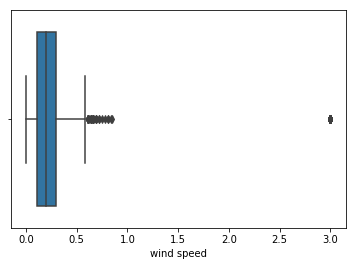

In [343]:
import seaborn as sns
%matplotlib inline
sns.boxplot(x=df['wind speed'])

In [344]:
def out(x):
    if ((x < df['wind speed'].mean() + 2 * df['wind speed'].std()) and (x > df['wind speed'].mean() - 2 * df['wind speed'].std())):
        return 0
    else:
        return 1

In [345]:
df['out'] = df['wind speed'].apply(lambda x: out(x))

In [346]:
df.out.value_counts()

0    12440
1     1425
Name: out, dtype: int64

In [347]:
df.drop(df[df['out'] == 1].index, inplace = True) 

In [348]:
df.shape

(12440, 14)

In [369]:
df['weather situation'] = pd.Categorical(df['weather situation'], categories=[1,2,3,4])

In [370]:
df['weather situation'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [371]:
def binning(i):
    if i in [1,2,3,4]:
        return 1
    elif i in [5,6,7,8]:
        return 2
    elif i in [9, 10, 11, 12]:
        return 3
    elif i in [13,14,15,16]:
        return 4
    elif i in [17,18,19,20]:
        return 5
    elif i in [21,22,23,24]:
        return 6

In [372]:
df['hour_bin']= df.hour.apply(lambda x : binning(x))
df.head()

,instance (id),date,season,hour,holiday,weekday,working day,weather situation,temperature,atemperature,humidity,wind speed,hour_bin
0,0,2012-05-30,2,18,0,Wednesday,1,1,0.74,0.6667,0.48,0.1642,5.0
1,1,2011-06-30,3,3,0,Thursday,1,1,0.60,0.6061,0.60,0.1642,1.0
2,2,2011-12-22,1,8,0,Thursday,1,2,0.36,0.3788,0.87,3.0000,2.0
3,3,2011-11-13,4,19,0,Sunday,0,1,0.50,0.4848,0.29,0.3582,5.0
4,4,2012-01-05,1,7,0,Thursday,1,2,0.20,0.2273,0.69,0.0896,2.0


In [373]:
# def f(x):
#     if x==0:
#         return -1
#     else:
#         return 1

# train['holiday']=train['holiday'].apply(f)
# train['working day']=train['working day'].apply(f)

##### Creating features from date

In [374]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.dtypes

instance (id)                 int64
date                 datetime64[ns]
season                        int64
hour                          int64
holiday                       int64
weekday                      object
working day                   int64
weather situation          category
temperature                 float64
atemperature                float64
humidity                    float64
wind speed                  float64
hour_bin                    float64
dtype: object

In [375]:
df.loc[:, 'month'] = df.date.dt.month
df.loc[:, 'week_of_month'] = np.ceil(df.date.dt.day / 7)
df.head()

,instance (id),date,season,hour,holiday,weekday,working day,weather situation,temperature,atemperature,humidity,wind speed,hour_bin,month,week_of_month
0,0,2012-05-30,2,18,0,Wednesday,1,1,0.74,0.6667,0.48,0.1642,5.0,5,5.0
1,1,2011-06-30,3,3,0,Thursday,1,1,0.60,0.6061,0.60,0.1642,1.0,6,5.0
2,2,2011-12-22,1,8,0,Thursday,1,2,0.36,0.3788,0.87,3.0000,2.0,12,4.0
3,3,2011-11-13,4,19,0,Sunday,0,1,0.50,0.4848,0.29,0.3582,5.0,11,2.0
4,4,2012-01-05,1,7,0,Thursday,1,2,0.20,0.2273,0.69,0.0896,2.0,1,1.0


In [377]:
# dropping unnecessary features for now
df = df.drop(['instance (id)', 'date', 'temperature', 'working day', 'hour'], axis=1)
df.head()

,season,holiday,weekday,weather situation,atemperature,humidity,wind speed,hour_bin,month,week_of_month
0,2,0,Wednesday,1,0.6667,0.48,0.1642,5.0,5,5.0
1,3,0,Thursday,1,0.6061,0.60,0.1642,1.0,6,5.0
2,1,0,Thursday,2,0.3788,0.87,3.0000,2.0,12,4.0
3,4,0,Sunday,1,0.4848,0.29,0.3582,5.0,11,2.0
4,1,0,Thursday,2,0.2273,0.69,0.0896,2.0,1,1.0


In [378]:
# Creating dummies

df = pd.get_dummies(data=df, columns=['season', 'weekday', 'weather situation', 'hour_bin', 'month', 'week_of_month'], drop_first=True)
df.head()

,holiday,atemperature,humidity,wind speed,season_2,season_3,season_4,weekday_Monday,weekday_Saturday,weekday_Sunday,...,month_7,month_8,month_9,month_10,month_11,month_12,week_of_month_2.0,week_of_month_3.0,week_of_month_4.0,week_of_month_5.0
0,0,0.6667,0.48,0.1642,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.6061,0.60,0.1642,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.3788,0.87,3.0000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0.4848,0.29,0.3582,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,0,0.2273,0.69,0.0896,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [379]:
# scaling
import pandas as pd
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df[['wind speed','humidity']] = scaler.fit_transform(df[['wind speed','humidity']])

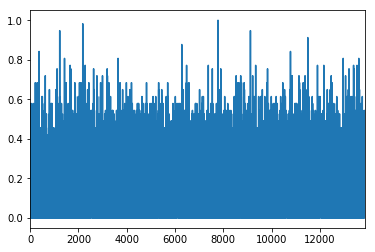

In [357]:
df['wind speed'].plot()

In [358]:
df.head()

,holiday,atemperature,humidity,wind speed,count,season_2,season_3,season_4,weekday_Monday,weekday_Saturday,...,month_7,month_8,month_9,month_10,month_11,month_12,week_of_month_2.0,week_of_month_3.0,week_of_month_4.0,week_of_month_5.0
0,0,0.5000,0.276667,0.228047,26,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0.6212,0.103333,0.386035,192,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.5303,0.293333,0.122840,275,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.2121,1.000000,0.350888,125,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0.4394,0.126667,0.228047,147,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [380]:
print(df.shape)

(3514, 36)


In [160]:
df['weather situation_4']=0

In [360]:
print(df.shape)
y = df['count']
X = df.drop('count', axis=1)
print(y.shape)
print(X.shape)

(12440, 37)
(12440,)
(12440, 36)


In [361]:
df.columns

Index(['holiday', 'atemperature', 'humidity', 'wind speed', 'count',
       'season_2', 'season_3', 'season_4', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weather situation_2',
       'weather situation_3', 'weather situation_4', 'hour_bin_2.0',
       'hour_bin_3.0', 'hour_bin_4.0', 'hour_bin_5.0', 'hour_bin_6.0',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'week_of_month_2.0', 'week_of_month_3.0', 'week_of_month_4.0',
       'week_of_month_5.0'],
      dtype='object')

In [126]:
list1=['holiday', 'atemperature', 'humidity', 'wind speed', 'count',
       'season_2', 'season_3', 'season_4', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weather situation_2',
       'weather situation_3', 'weather situation_4', 'hour_bin_2.0',
       'hour_bin_3.0', 'hour_bin_4.0', 'hour_bin_5.0', 'hour_bin_6.0',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'week_of_month_2.0', 'week_of_month_3.0', 'week_of_month_4.0',
       'week_of_month_5.0']

In [127]:
len(list1)

37

In [163]:
list2=df.columns

In [164]:
len(list2)

36

In [165]:
set(list1) ^ set(list2)

{'count'}

### Modelling

In [362]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [363]:
X.shape[1]

36

In [364]:
X.columns

Index(['holiday', 'atemperature', 'humidity', 'wind speed', 'season_2',
       'season_3', 'season_4', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weather situation_2', 'weather situation_3',
       'weather situation_4', 'hour_bin_2.0', 'hour_bin_3.0', 'hour_bin_4.0',
       'hour_bin_5.0', 'hour_bin_6.0', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'week_of_month_2.0', 'week_of_month_3.0',
       'week_of_month_4.0', 'week_of_month_5.0'],
      dtype='object')

In [365]:
X.iloc[:, 0:15]

,holiday,atemperature,humidity,wind speed,season_2,season_3,season_4,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather situation_2,weather situation_3
0,0,0.5000,0.276667,0.228047,0,0,1,0,0,0,0,0,0,0,0
1,0,0.6212,0.103333,0.386035,1,0,0,0,0,0,0,0,0,0,0
2,0,0.5303,0.293333,0.122840,1,0,0,0,0,0,0,0,0,1,0
3,0,0.2121,1.000000,0.350888,0,0,0,0,0,1,0,0,0,1,0
4,0,0.4394,0.126667,0.228047,0,0,0,0,0,0,0,1,0,0,0
5,0,0.4242,0.236667,0.263195,0,0,1,0,0,0,0,0,1,0,0
6,0,0.6970,0.103333,0.000000,0,1,0,0,0,0,0,0,1,0,0
8,0,0.4545,1.000000,0.491243,0,0,0,0,0,0,0,1,0,0,0
9,0,0.6515,0.193333,0.157870,0,1,0,0,0,1,0,0,0,0,0
12,0,0.6515,0.216667,0.228047,0,1,0,0,0,0,0,0,0,0,0


In [367]:
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None)))
opt = SGD(lr=0.05) 
model.compile(loss='mean_squared_error', optimizer=opt)
model.fit(X, y, epochs=20000, batch_size=X.shape[0])

Epoch 1/20000
12440/12440 [==============================] - 0s 35us/step - loss: 68471.1328
Epoch 2/20000
12440/12440 [==============================] - 0s 1us/step - loss: 53332.4336
Epoch 3/20000
12440/12440 [==============================] - 0s 1us/step - loss: 44049.6680
Epoch 4/20000
12440/12440 [==============================] - 0s 1us/step - loss: 38322.9727
Epoch 5/20000
12440/12440 [==============================] - 0s 2us/step - loss: 34756.8281
Epoch 6/20000
12440/12440 [==============================] - 0s 1us/step - loss: 32504.3555
Epoch 7/20000
12440/12440 [==============================] - 0s 1us/step - loss: 31051.5645
Epoch 8/20000
12440/12440 [==============================] - 0s 1us/step - loss: 30086.5293
Epoch 9/20000
12440/12440 [==============================] - 0s 1us/step - loss: 29419.8613
Epoch 10/20000
12440/12440 [==============================] - 0s 2us/step - loss: 28936.5703
Epoch 11/20000
12440/12440 [==============================] - 0s 1us/step - lo

Epoch 90/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21347.9180
Epoch 91/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21311.9160
Epoch 92/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21276.4570
Epoch 93/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21241.5176
Epoch 94/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21207.0938
Epoch 95/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21173.1699
Epoch 96/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21139.7402
Epoch 97/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21106.7812
Epoch 98/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21074.2969
Epoch 99/20000
12440/12440 [==============================] - 0s 2us/step - loss: 21042.2695
Epoch 100/20000
12440/12440 [==============================] - 0s 2us/

Epoch 178/20000
12440/12440 [==============================] - 0s 2us/step - loss: 19397.0605
Epoch 179/20000
12440/12440 [==============================] - 0s 2us/step - loss: 19383.1797
Epoch 180/20000
12440/12440 [==============================] - 0s 2us/step - loss: 19369.4023
Epoch 181/20000
12440/12440 [==============================] - 0s 2us/step - loss: 19355.7324
Epoch 182/20000
12440/12440 [==============================] - 0s 2us/step - loss: 19342.1680
Epoch 183/20000
12440/12440 [==============================] - 0s 2us/step - loss: 19328.7168
Epoch 184/20000
12440/12440 [==============================] - 0s 3us/step - loss: 19315.3652
Epoch 185/20000
12440/12440 [==============================] - 0s 2us/step - loss: 19302.1191
Epoch 186/20000
12440/12440 [==============================] - 0s 2us/step - loss: 19288.9766
Epoch 187/20000
12440/12440 [==============================] - 0s 1us/step - loss: 19275.9297
Epoch 188/20000
12440/12440 [==============================]

12440/12440 [==============================] - 0s 2us/step - loss: 18496.1211
Epoch 266/20000
12440/12440 [==============================] - 0s 2us/step - loss: 18488.4883
Epoch 267/20000
12440/12440 [==============================] - 0s 2us/step - loss: 18480.8984
Epoch 268/20000
12440/12440 [==============================] - 0s 1us/step - loss: 18473.3613
Epoch 269/20000
12440/12440 [==============================] - 0s 2us/step - loss: 18465.8633
Epoch 270/20000
12440/12440 [==============================] - 0s 2us/step - loss: 18458.4121
Epoch 271/20000
12440/12440 [==============================] - 0s 2us/step - loss: 18451.0000
Epoch 272/20000
12440/12440 [==============================] - 0s 2us/step - loss: 18443.6484
Epoch 273/20000
12440/12440 [==============================] - 0s 2us/step - loss: 18436.3340
Epoch 274/20000
12440/12440 [==============================] - 0s 2us/step - loss: 18429.0645
Epoch 275/20000
12440/12440 [==============================] - 0s 2us/step -

Epoch 353/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17971.3359
Epoch 354/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17966.7676
Epoch 355/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17962.2246
Epoch 356/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17957.7090
Epoch 357/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17953.2090
Epoch 358/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17948.7461
Epoch 359/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17944.2988
Epoch 360/20000
12440/12440 [==============================] - 0s 3us/step - loss: 17939.8809
Epoch 361/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17935.4844
Epoch 362/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17931.1133
Epoch 363/20000
12440/12440 [==============================]

Epoch 441/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17651.0664
Epoch 442/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17648.2207
Epoch 443/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17645.3887
Epoch 444/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17642.5781
Epoch 445/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17639.7734
Epoch 446/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17636.9844
Epoch 447/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17634.2168
Epoch 448/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17631.4590
Epoch 449/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17628.7148
Epoch 450/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17625.9824
Epoch 451/20000
12440/12440 [==============================]

Epoch 528/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17450.6504
Epoch 529/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17448.8164
Epoch 530/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17446.9863
Epoch 531/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17445.1719
Epoch 532/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17443.3652
Epoch 533/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17441.5664
Epoch 534/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17439.7734
Epoch 535/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17437.9902
Epoch 536/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17436.2168
Epoch 537/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17434.4492
Epoch 538/20000
12440/12440 [==============================]

Epoch 616/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17318.4395
Epoch 617/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17317.2305
Epoch 618/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17316.0176
Epoch 619/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17314.8145
Epoch 620/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17313.6211
Epoch 621/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17312.4316
Epoch 622/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17311.2402
Epoch 623/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17310.0605
Epoch 624/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17308.8867
Epoch 625/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17307.7109
Epoch 626/20000
12440/12440 [==============================]

12440/12440 [==============================] - 0s 2us/step - loss: 17230.6074
Epoch 704/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17229.7793
Epoch 705/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17228.9551
Epoch 706/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17228.1289
Epoch 707/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17227.3086
Epoch 708/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17226.4902
Epoch 709/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17225.6777
Epoch 710/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17224.8652
Epoch 711/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17224.0586
Epoch 712/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17223.2559
Epoch 713/20000
12440/12440 [==============================] - 0s 2us/step -

Epoch 791/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17168.9473
Epoch 792/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17168.3633
Epoch 793/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17167.7773
Epoch 794/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17167.1992
Epoch 795/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17166.6191
Epoch 796/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17166.0391
Epoch 797/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17165.4668
Epoch 798/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17164.8945
Epoch 799/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17164.3223
Epoch 800/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17163.7559
Epoch 801/20000
12440/12440 [==============================]

12440/12440 [==============================] - 0s 2us/step - loss: 17125.2070
Epoch 879/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17124.7754
Epoch 880/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17124.3477
Epoch 881/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17123.9199
Epoch 882/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17123.4980
Epoch 883/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17123.0762
Epoch 884/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17122.6523
Epoch 885/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17122.2324
Epoch 886/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17121.8145
Epoch 887/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17121.3965
Epoch 888/20000
12440/12440 [==============================] - 0s 2us/step -

Epoch 966/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17092.3555
Epoch 967/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17092.0312
Epoch 968/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17091.7090
Epoch 969/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17091.3867
Epoch 970/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17091.0645
Epoch 971/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17090.7480
Epoch 972/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17090.4316
Epoch 973/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17090.1113
Epoch 974/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17089.7930
Epoch 975/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17089.4824
Epoch 976/20000
12440/12440 [==============================]

Epoch 1053/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17067.4570
Epoch 1054/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17067.2051
Epoch 1055/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17066.9551
Epoch 1056/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17066.7031
Epoch 1057/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17066.4492
Epoch 1058/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17066.2012
Epoch 1059/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17065.9531
Epoch 1060/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17065.7051
Epoch 1061/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17065.4570
Epoch 1062/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17065.2070
Epoch 1063/20000
12440/12440 [====================

Epoch 1140/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17047.7656
Epoch 1141/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17047.5625
Epoch 1142/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17047.3594
Epoch 1143/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17047.1582
Epoch 1144/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17046.9590
Epoch 1145/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17046.7598
Epoch 1146/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17046.5547
Epoch 1147/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17046.3574
Epoch 1148/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17046.1582
Epoch 1149/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17045.9609
Epoch 1150/20000
12440/12440 [====================

Epoch 1227/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17031.7793
Epoch 1228/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17031.6172
Epoch 1229/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17031.4512
Epoch 1230/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17031.2832
Epoch 1231/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17031.1191
Epoch 1232/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17030.9512
Epoch 1233/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17030.7891
Epoch 1234/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17030.6250
Epoch 1235/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17030.4570
Epoch 1236/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17030.2988
Epoch 1237/20000
12440/12440 [====================

Epoch 1314/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17018.5195
Epoch 1315/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17018.3789
Epoch 1316/20000
12440/12440 [==============================] - 0s 1us/step - loss: 17018.2422
Epoch 1317/20000
12440/12440 [==============================] - 0s 3us/step - loss: 17018.0977
Epoch 1318/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17017.9629
Epoch 1319/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17017.8242
Epoch 1320/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17017.6875
Epoch 1321/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17017.5469
Epoch 1322/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17017.4102
Epoch 1323/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17017.2734
Epoch 1324/20000
12440/12440 [====================

Epoch 1401/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17007.3145
Epoch 1402/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17007.1973
Epoch 1403/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17007.0781
Epoch 1404/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17006.9609
Epoch 1405/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17006.8418
Epoch 1406/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17006.7207
Epoch 1407/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17006.6094
Epoch 1408/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17006.4902
Epoch 1409/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17006.3711
Epoch 1410/20000
12440/12440 [==============================] - 0s 2us/step - loss: 17006.2559
Epoch 1411/20000
12440/12440 [====================

Epoch 1488/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16997.7148
Epoch 1489/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16997.6094
Epoch 1490/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16997.5098
Epoch 1491/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16997.4062
Epoch 1492/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16997.3047
Epoch 1493/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16997.2012
Epoch 1494/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16997.1016
Epoch 1495/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16997.0000
Epoch 1496/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16996.9004
Epoch 1497/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16996.7969
Epoch 1498/20000
12440/12440 [====================

Epoch 1575/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16989.3828
Epoch 1576/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16989.2969
Epoch 1577/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16989.2070
Epoch 1578/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16989.1191
Epoch 1579/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16989.0293
Epoch 1580/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16988.9395
Epoch 1581/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16988.8496
Epoch 1582/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16988.7598
Epoch 1583/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16988.6738
Epoch 1584/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16988.5820
Epoch 1585/20000
12440/12440 [====================

Epoch 1662/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16982.0918
Epoch 1663/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16982.0137
Epoch 1664/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16981.9336
Epoch 1665/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16981.8555
Epoch 1666/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16981.7773
Epoch 1667/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16981.7012
Epoch 1668/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16981.6250
Epoch 1669/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16981.5430
Epoch 1670/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16981.4668
Epoch 1671/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16981.3887
Epoch 1672/20000
12440/12440 [====================

Epoch 1749/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.6582
Epoch 1750/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.5938
Epoch 1751/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.5215
Epoch 1752/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.4512
Epoch 1753/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.3848
Epoch 1754/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.3164
Epoch 1755/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.2461
Epoch 1756/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.1777
Epoch 1757/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.1094
Epoch 1758/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16975.0371
Epoch 1759/20000
12440/12440 [====================

Epoch 1836/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.9531
Epoch 1837/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.8926
Epoch 1838/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.8281
Epoch 1839/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.7676
Epoch 1840/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.7090
Epoch 1841/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.6484
Epoch 1842/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.5820
Epoch 1843/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.5234
Epoch 1844/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.4590
Epoch 1845/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16969.4023
Epoch 1846/20000
12440/12440 [====================

Epoch 1923/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.8652
Epoch 1924/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.8086
Epoch 1925/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.7559
Epoch 1926/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.6992
Epoch 1927/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.6465
Epoch 1928/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.5898
Epoch 1929/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.5332
Epoch 1930/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.4805
Epoch 1931/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.4277
Epoch 1932/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16964.3730
Epoch 1933/20000
12440/12440 [====================

Epoch 2010/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16960.3105
Epoch 2011/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16960.2617
Epoch 2012/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16960.2109
Epoch 2013/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16960.1621
Epoch 2014/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16960.1133
Epoch 2015/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16960.0625
Epoch 2016/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16960.0156
Epoch 2017/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16959.9648
Epoch 2018/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16959.9160
Epoch 2019/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16959.8633
Epoch 2020/20000
12440/12440 [====================

Epoch 2097/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16956.2168
Epoch 2098/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16956.1758
Epoch 2099/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16956.1270
Epoch 2100/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16956.0820
Epoch 2101/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16956.0352
Epoch 2102/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16955.9941
Epoch 2103/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16955.9473
Epoch 2104/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16955.9043
Epoch 2105/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16955.8633
Epoch 2106/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16955.8164
Epoch 2107/20000
12440/12440 [====================

Epoch 2184/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.5254
Epoch 2185/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.4883
Epoch 2186/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.4434
Epoch 2187/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.4043
Epoch 2188/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.3633
Epoch 2189/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.3262
Epoch 2190/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.2832
Epoch 2191/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.2441
Epoch 2192/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.2051
Epoch 2193/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16952.1641
Epoch 2194/20000
12440/12440 [====================

Epoch 2271/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16949.1914
Epoch 2272/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16949.1543
Epoch 2273/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16949.1191
Epoch 2274/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16949.0820
Epoch 2275/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16949.0469
Epoch 2276/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16949.0078
Epoch 2277/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16948.9707
Epoch 2278/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16948.9355
Epoch 2279/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16948.9004
Epoch 2280/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16948.8652
Epoch 2281/20000
12440/12440 [====================

Epoch 2358/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16946.1680
Epoch 2359/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16946.1406
Epoch 2360/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16946.1074
Epoch 2361/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16946.0703
Epoch 2362/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16946.0391
Epoch 2363/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16946.0098
Epoch 2364/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16945.9727
Epoch 2365/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16945.9414
Epoch 2366/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16945.9082
Epoch 2367/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16945.8770
Epoch 2368/20000
12440/12440 [====================

Epoch 2445/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16943.4277
Epoch 2446/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16943.3945
Epoch 2447/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16943.3691
Epoch 2448/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16943.3340
Epoch 2449/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16943.3066
Epoch 2450/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16943.2754
Epoch 2451/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16943.2461
Epoch 2452/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16943.2148
Epoch 2453/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16943.1895
Epoch 2454/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16943.1582
Epoch 2455/20000
12440/12440 [====================

Epoch 2532/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.9336
Epoch 2533/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.9043
Epoch 2534/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.8770
Epoch 2535/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.8496
Epoch 2536/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.8223
Epoch 2537/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.7969
Epoch 2538/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.7715
Epoch 2539/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.7441
Epoch 2540/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.7129
Epoch 2541/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16940.6895
Epoch 2542/20000
12440/12440 [====================

Epoch 2619/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.6582
Epoch 2620/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.6309
Epoch 2621/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.6035
Epoch 2622/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.5840
Epoch 2623/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.5566
Epoch 2624/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.5312
Epoch 2625/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.5059
Epoch 2626/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.4824
Epoch 2627/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.4590
Epoch 2628/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16938.4355
Epoch 2629/20000
12440/12440 [====================

Epoch 2706/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.5781
Epoch 2707/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.5547
Epoch 2708/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.5332
Epoch 2709/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.5117
Epoch 2710/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.4883
Epoch 2711/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.4668
Epoch 2712/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.4434
Epoch 2713/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.4199
Epoch 2714/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.3965
Epoch 2715/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16936.3770
Epoch 2716/20000
12440/12440 [====================

Epoch 2793/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.6758
Epoch 2794/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.6582
Epoch 2795/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.6348
Epoch 2796/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.6152
Epoch 2797/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.5977
Epoch 2798/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.5723
Epoch 2799/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.5508
Epoch 2800/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.5332
Epoch 2801/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.5117
Epoch 2802/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16934.4883
Epoch 2803/20000
12440/12440 [====================

Epoch 2880/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16932.9336
Epoch 2881/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16932.9141
Epoch 2882/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16932.8945
Epoch 2883/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16932.8750
Epoch 2884/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16932.8574
Epoch 2885/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16932.8418
Epoch 2886/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16932.8203
Epoch 2887/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16932.7988
Epoch 2888/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16932.7812
Epoch 2889/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16932.7598
Epoch 2890/20000
12440/12440 [====================

12440/12440 [==============================] - 0s 1us/step - loss: 16931.3496
Epoch 2967/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16931.3340
Epoch 2968/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16931.3164
Epoch 2969/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16931.2930
Epoch 2970/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16931.2793
Epoch 2971/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16931.2637
Epoch 2972/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16931.2441
Epoch 2973/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16931.2266
Epoch 2974/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16931.2070
Epoch 2975/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16931.1895
Epoch 2976/20000
12440/12440 [==============================] - 0s 

Epoch 3053/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16929.8730
Epoch 3054/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16929.8594
Epoch 3055/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16929.8418
Epoch 3056/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16929.8242
Epoch 3057/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16929.8086
Epoch 3058/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16929.7910
Epoch 3059/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16929.7793
Epoch 3060/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16929.7598
Epoch 3061/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16929.7461
Epoch 3062/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16929.7266
Epoch 3063/20000
12440/12440 [====================

Epoch 3140/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.5137
Epoch 3141/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.4980
Epoch 3142/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.4824
Epoch 3143/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.4707
Epoch 3144/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.4531
Epoch 3145/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.4395
Epoch 3146/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.4219
Epoch 3147/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.4121
Epoch 3148/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.3945
Epoch 3149/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16928.3789
Epoch 3150/20000
12440/12440 [====================

Epoch 3227/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16927.2578
Epoch 3228/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16927.2441
Epoch 3229/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16927.2344
Epoch 3230/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16927.2188
Epoch 3231/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16927.2051
Epoch 3232/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16927.1895
Epoch 3233/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16927.1777
Epoch 3234/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16927.1621
Epoch 3235/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16927.1484
Epoch 3236/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16927.1309
Epoch 3237/20000
12440/12440 [====================

Epoch 3314/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16926.1016
Epoch 3315/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16926.0879
Epoch 3316/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16926.0742
Epoch 3317/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16926.0586
Epoch 3318/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16926.0488
Epoch 3319/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16926.0312
Epoch 3320/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16926.0215
Epoch 3321/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16926.0098
Epoch 3322/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16925.9961
Epoch 3323/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16925.9863
Epoch 3324/20000
12440/12440 [====================

Epoch 3401/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16925.0234
Epoch 3402/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16925.0156
Epoch 3403/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16925.0000
Epoch 3404/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.9844
Epoch 3405/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.9766
Epoch 3406/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.9629
Epoch 3407/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.9531
Epoch 3408/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.9395
Epoch 3409/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.9277
Epoch 3410/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.9160
Epoch 3411/20000
12440/12440 [====================

Epoch 3488/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.0273
Epoch 3489/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.0156
Epoch 3490/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16924.0059
Epoch 3491/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.9902
Epoch 3492/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.9844
Epoch 3493/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.9746
Epoch 3494/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.9590
Epoch 3495/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.9473
Epoch 3496/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.9375
Epoch 3497/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.9258
Epoch 3498/20000
12440/12440 [====================

Epoch 3575/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16923.0977
Epoch 3576/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.0898
Epoch 3577/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.0762
Epoch 3578/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.0703
Epoch 3579/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.0527
Epoch 3580/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.0488
Epoch 3581/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.0332
Epoch 3582/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.0293
Epoch 3583/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.0156
Epoch 3584/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16923.0059
Epoch 3585/20000
12440/12440 [====================

Epoch 3662/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.2363
Epoch 3663/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.2246
Epoch 3664/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.2148
Epoch 3665/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.2051
Epoch 3666/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.1992
Epoch 3667/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.1895
Epoch 3668/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.1758
Epoch 3669/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.1680
Epoch 3670/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.1602
Epoch 3671/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16922.1504
Epoch 3672/20000
12440/12440 [====================

Epoch 3749/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.4297
Epoch 3750/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.4219
Epoch 3751/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.4141
Epoch 3752/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.4043
Epoch 3753/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.3926
Epoch 3754/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.3848
Epoch 3755/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.3770
Epoch 3756/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.3691
Epoch 3757/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.3613
Epoch 3758/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16921.3496
Epoch 3759/20000
12440/12440 [====================

Epoch 3836/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16920.6758
Epoch 3837/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16920.6680
Epoch 3838/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16920.6602
Epoch 3839/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16920.6523
Epoch 3840/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16920.6484
Epoch 3841/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16920.6387
Epoch 3842/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16920.6270
Epoch 3843/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16920.6230
Epoch 3844/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16920.6113
Epoch 3845/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16920.6016
Epoch 3846/20000
12440/12440 [====================

Epoch 3923/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.9746
Epoch 3924/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16919.9668
Epoch 3925/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16919.9609
Epoch 3926/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.9512
Epoch 3927/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.9434
Epoch 3928/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.9355
Epoch 3929/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.9258
Epoch 3930/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.9199
Epoch 3931/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.9102
Epoch 3932/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.9043
Epoch 3933/20000
12440/12440 [====================

Epoch 4010/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.3125
Epoch 4011/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.3047
Epoch 4012/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.3008
Epoch 4013/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.2930
Epoch 4014/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.2832
Epoch 4015/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.2773
Epoch 4016/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.2695
Epoch 4017/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.2598
Epoch 4018/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.2559
Epoch 4019/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16919.2480
Epoch 4020/20000
12440/12440 [====================

Epoch 4097/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6973
Epoch 4098/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6875
Epoch 4099/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6797
Epoch 4100/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6758
Epoch 4101/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6680
Epoch 4102/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6621
Epoch 4103/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6582
Epoch 4104/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6504
Epoch 4105/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6445
Epoch 4106/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.6348
Epoch 4107/20000
12440/12440 [====================

Epoch 4184/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.1152
Epoch 4185/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16918.1074
Epoch 4186/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.1074
Epoch 4187/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.0977
Epoch 4188/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.0918
Epoch 4189/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.0840
Epoch 4190/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.0762
Epoch 4191/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.0723
Epoch 4192/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.0625
Epoch 4193/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16918.0547
Epoch 4194/20000
12440/12440 [====================

Epoch 4271/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.5703
Epoch 4272/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16917.5605
Epoch 4273/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.5566
Epoch 4274/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.5508
Epoch 4275/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.5469
Epoch 4276/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.5430
Epoch 4277/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16917.5352
Epoch 4278/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.5254
Epoch 4279/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.5195
Epoch 4280/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.5156
Epoch 4281/20000
12440/12440 [====================

Epoch 4358/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0547
Epoch 4359/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0449
Epoch 4360/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0410
Epoch 4361/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0332
Epoch 4362/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0332
Epoch 4363/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0254
Epoch 4364/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0156
Epoch 4365/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0137
Epoch 4366/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0039
Epoch 4367/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16917.0020
Epoch 4368/20000
12440/12440 [====================

Epoch 4445/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5684
Epoch 4446/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5605
Epoch 4447/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5566
Epoch 4448/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5527
Epoch 4449/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5449
Epoch 4450/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5410
Epoch 4451/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5352
Epoch 4452/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5293
Epoch 4453/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5234
Epoch 4454/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.5176
Epoch 4455/20000
12440/12440 [====================

Epoch 4532/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.1094
Epoch 4533/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.1074
Epoch 4534/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.0957
Epoch 4535/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.0938
Epoch 4536/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.0859
Epoch 4537/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.0801
Epoch 4538/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16916.0742
Epoch 4539/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.0723
Epoch 4540/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16916.0664
Epoch 4541/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16916.0645
Epoch 4542/20000
12440/12440 [====================

Epoch 4619/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.6738
Epoch 4620/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.6699
Epoch 4621/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.6621
Epoch 4622/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.6582
Epoch 4623/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.6543
Epoch 4624/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.6504
Epoch 4625/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.6426
Epoch 4626/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.6387
Epoch 4627/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16915.6328
Epoch 4628/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.6289
Epoch 4629/20000
12440/12440 [====================

Epoch 4706/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.2617
Epoch 4707/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.2539
Epoch 4708/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.2520
Epoch 4709/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16915.2461
Epoch 4710/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.2441
Epoch 4711/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.2363
Epoch 4712/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.2305
Epoch 4713/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.2285
Epoch 4714/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16915.2246
Epoch 4715/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16915.2188
Epoch 4716/20000
12440/12440 [====================

Epoch 4793/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.8672
Epoch 4794/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16914.8691
Epoch 4795/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.8613
Epoch 4796/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.8555
Epoch 4797/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.8535
Epoch 4798/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.8496
Epoch 4799/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.8418
Epoch 4800/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.8398
Epoch 4801/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.8340
Epoch 4802/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16914.8301
Epoch 4803/20000
12440/12440 [====================

Epoch 4880/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.4980
Epoch 4881/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16914.4922
Epoch 4882/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.4883
Epoch 4883/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.4824
Epoch 4884/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.4805
Epoch 4885/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.4766
Epoch 4886/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.4727
Epoch 4887/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.4688
Epoch 4888/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.4648
Epoch 4889/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.4609
Epoch 4890/20000
12440/12440 [====================

Epoch 4967/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16914.1484
Epoch 4968/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.1406
Epoch 4969/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.1406
Epoch 4970/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.1309
Epoch 4971/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.1270
Epoch 4972/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.1230
Epoch 4973/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.1172
Epoch 4974/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.1152
Epoch 4975/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.1113
Epoch 4976/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16914.1094
Epoch 4977/20000
12440/12440 [====================

Epoch 5054/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.8086
Epoch 5055/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16913.8008
Epoch 5056/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.8008
Epoch 5057/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.7988
Epoch 5058/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.7949
Epoch 5059/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.7910
Epoch 5060/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.7871
Epoch 5061/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.7832
Epoch 5062/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.7793
Epoch 5063/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.7754
Epoch 5064/20000
12440/12440 [====================

Epoch 5141/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.4863
Epoch 5142/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.4824
Epoch 5143/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16913.4824
Epoch 5144/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.4746
Epoch 5145/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.4707
Epoch 5146/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.4668
Epoch 5147/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.4648
Epoch 5148/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.4629
Epoch 5149/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.4590
Epoch 5150/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.4551
Epoch 5151/20000
12440/12440 [====================

Epoch 5228/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1816
Epoch 5229/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1777
Epoch 5230/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1699
Epoch 5231/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1680
Epoch 5232/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1699
Epoch 5233/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1621
Epoch 5234/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1621
Epoch 5235/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1582
Epoch 5236/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1543
Epoch 5237/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16913.1523
Epoch 5238/20000
12440/12440 [====================

Epoch 5315/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.8906
Epoch 5316/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.8848
Epoch 5317/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.8867
Epoch 5318/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16912.8750
Epoch 5319/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.8750
Epoch 5320/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.8711
Epoch 5321/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.8711
Epoch 5322/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.8652
Epoch 5323/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.8613
Epoch 5324/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.8613
Epoch 5325/20000
12440/12440 [====================

Epoch 5402/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.6113
Epoch 5403/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.6074
Epoch 5404/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.6035
Epoch 5405/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.5977
Epoch 5406/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.5938
Epoch 5407/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.5918
Epoch 5408/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.5938
Epoch 5409/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16912.5859
Epoch 5410/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.5859
Epoch 5411/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.5859
Epoch 5412/20000
12440/12440 [====================

Epoch 5489/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16912.3398
Epoch 5490/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16912.3398
Epoch 5491/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.3379
Epoch 5492/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.3379
Epoch 5493/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.3301
Epoch 5494/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.3281
Epoch 5495/20000
12440/12440 [==============================] - 0s 3us/step - loss: 16912.3262
Epoch 5496/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.3242
Epoch 5497/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.3184
Epoch 5498/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.3125
Epoch 5499/20000
12440/12440 [====================

Epoch 5576/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.0859
Epoch 5577/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16912.0801
Epoch 5578/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.0801
Epoch 5579/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16912.0781
Epoch 5580/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.0781
Epoch 5581/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.0703
Epoch 5582/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16912.0684
Epoch 5583/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16912.0664
Epoch 5584/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.0645
Epoch 5585/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16912.0625
Epoch 5586/20000
12440/12440 [====================

Epoch 5663/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.8398
Epoch 5664/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.8359
Epoch 5665/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.8359
Epoch 5666/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.8359
Epoch 5667/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.8340
Epoch 5668/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.8281
Epoch 5669/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.8281
Epoch 5670/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.8223
Epoch 5671/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.8203
Epoch 5672/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.8125
Epoch 5673/20000
12440/12440 [====================

Epoch 5750/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.6055
Epoch 5751/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.6035
Epoch 5752/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.6035
Epoch 5753/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.6016
Epoch 5754/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.5996
Epoch 5755/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.5957
Epoch 5756/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.5879
Epoch 5757/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.5879
Epoch 5758/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.5918
Epoch 5759/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.5801
Epoch 5760/20000
12440/12440 [====================

Epoch 5837/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.3809
Epoch 5838/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.3789
Epoch 5839/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.3750
Epoch 5840/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.3730
Epoch 5841/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.3711
Epoch 5842/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.3691
Epoch 5843/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.3652
Epoch 5844/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.3613
Epoch 5845/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.3613
Epoch 5846/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.3594
Epoch 5847/20000
12440/12440 [====================

Epoch 5924/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.1660
Epoch 5925/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.1660
Epoch 5926/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.1621
Epoch 5927/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.1582
Epoch 5928/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.1504
Epoch 5929/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.1504
Epoch 5930/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.1484
Epoch 5931/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.1465
Epoch 5932/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16911.1445
Epoch 5933/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16911.1426
Epoch 5934/20000
12440/12440 [====================

Epoch 6011/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.9551
Epoch 6012/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.9551
Epoch 6013/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.9512
Epoch 6014/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.9512
Epoch 6015/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.9453
Epoch 6016/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.9453
Epoch 6017/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.9414
Epoch 6018/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.9375
Epoch 6019/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.9395
Epoch 6020/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.9355
Epoch 6021/20000
12440/12440 [====================

Epoch 6098/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.7559
Epoch 6099/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.7559
Epoch 6100/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.7559
Epoch 6101/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.7500
Epoch 6102/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.7480
Epoch 6103/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.7441
Epoch 6104/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.7441
Epoch 6105/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.7441
Epoch 6106/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.7402
Epoch 6107/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.7402
Epoch 6108/20000
12440/12440 [====================

Epoch 6185/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.5625
Epoch 6186/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.5605
Epoch 6187/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.5586
Epoch 6188/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.5566
Epoch 6189/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.5547
Epoch 6190/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.5547
Epoch 6191/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.5508
Epoch 6192/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.5527
Epoch 6193/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.5449
Epoch 6194/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.5469
Epoch 6195/20000
12440/12440 [====================

Epoch 6272/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.3789
Epoch 6273/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.3750
Epoch 6274/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.3711
Epoch 6275/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.3711
Epoch 6276/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.3672
Epoch 6277/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.3672
Epoch 6278/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.3633
Epoch 6279/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.3652
Epoch 6280/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.3613
Epoch 6281/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.3594
Epoch 6282/20000
12440/12440 [====================

Epoch 6359/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.1992
Epoch 6360/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.1934
Epoch 6361/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.1934
Epoch 6362/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.1934
Epoch 6363/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.1934
Epoch 6364/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.1895
Epoch 6365/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.1855
Epoch 6366/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.1875
Epoch 6367/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.1836
Epoch 6368/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.1836
Epoch 6369/20000
12440/12440 [====================

Epoch 6446/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.0254
Epoch 6447/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.0254
Epoch 6448/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.0234
Epoch 6449/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.0234
Epoch 6450/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.0195
Epoch 6451/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.0195
Epoch 6452/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.0156
Epoch 6453/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.0137
Epoch 6454/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16910.0117
Epoch 6455/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16910.0059
Epoch 6456/20000
12440/12440 [====================

Epoch 6533/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8633
Epoch 6534/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8633
Epoch 6535/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8574
Epoch 6536/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8555
Epoch 6537/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8535
Epoch 6538/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8516
Epoch 6539/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8516
Epoch 6540/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8496
Epoch 6541/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8438
Epoch 6542/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.8438
Epoch 6543/20000
12440/12440 [====================

Epoch 6620/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.7012
Epoch 6621/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.6973
Epoch 6622/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.7012
Epoch 6623/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.6953
Epoch 6624/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.6934
Epoch 6625/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.6895
Epoch 6626/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.6895
Epoch 6627/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.6895
Epoch 6628/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.6875
Epoch 6629/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.6855
Epoch 6630/20000
12440/12440 [====================

Epoch 6707/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.5449
Epoch 6708/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.5430
Epoch 6709/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.5430
Epoch 6710/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.5391
Epoch 6711/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.5352
Epoch 6712/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.5332
Epoch 6713/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.5391
Epoch 6714/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.5312
Epoch 6715/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.5312
Epoch 6716/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.5293
Epoch 6717/20000
12440/12440 [====================

Epoch 6794/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.4023
Epoch 6795/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.3945
Epoch 6796/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.3887
Epoch 6797/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.3906
Epoch 6798/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.3906
Epoch 6799/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.3867
Epoch 6800/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.3887
Epoch 6801/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.3887
Epoch 6802/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.3887
Epoch 6803/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.3809
Epoch 6804/20000
12440/12440 [====================

Epoch 6881/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.2520
Epoch 6882/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.2500
Epoch 6883/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.2500
Epoch 6884/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.2480
Epoch 6885/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.2441
Epoch 6886/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.2480
Epoch 6887/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.2480
Epoch 6888/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.2422
Epoch 6889/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.2422
Epoch 6890/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.2383
Epoch 6891/20000
12440/12440 [====================

Epoch 6968/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.1133
Epoch 6969/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.1152
Epoch 6970/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.1133
Epoch 6971/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.1074
Epoch 6972/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.1113
Epoch 6973/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.1055
Epoch 6974/20000
12440/12440 [==============================] - 0s 3us/step - loss: 16909.1055
Epoch 6975/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16909.1055
Epoch 6976/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.1035
Epoch 6977/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16909.1016
Epoch 6978/20000
12440/12440 [====================

Epoch 7055/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.9805
Epoch 7056/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.9785
Epoch 7057/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.9766
Epoch 7058/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.9766
Epoch 7059/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.9746
Epoch 7060/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.9707
Epoch 7061/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.9727
Epoch 7062/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.9746
Epoch 7063/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.9707
Epoch 7064/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.9648
Epoch 7065/20000
12440/12440 [====================

Epoch 7142/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.8496
Epoch 7143/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.8496
Epoch 7144/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.8477
Epoch 7145/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.8457
Epoch 7146/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.8418
Epoch 7147/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.8438
Epoch 7148/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.8438
Epoch 7149/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.8418
Epoch 7150/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.8359
Epoch 7151/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.8340
Epoch 7152/20000
12440/12440 [====================

Epoch 7229/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.7246
Epoch 7230/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.7227
Epoch 7231/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.7207
Epoch 7232/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.7207
Epoch 7233/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.7207
Epoch 7234/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.7168
Epoch 7235/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.7129
Epoch 7236/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.7148
Epoch 7237/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.7148
Epoch 7238/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.7109
Epoch 7239/20000
12440/12440 [====================

Epoch 7316/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.6055
Epoch 7317/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.6016
Epoch 7318/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.5996
Epoch 7319/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.5996
Epoch 7320/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.5996
Epoch 7321/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.5938
Epoch 7322/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.5938
Epoch 7323/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.5957
Epoch 7324/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.5898
Epoch 7325/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.5898
Epoch 7326/20000
12440/12440 [====================

Epoch 7403/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.4844
Epoch 7404/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.4844
Epoch 7405/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.4824
Epoch 7406/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.4844
Epoch 7407/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.4805
Epoch 7408/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.4805
Epoch 7409/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.4785
Epoch 7410/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.4766
Epoch 7411/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.4746
Epoch 7412/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.4727
Epoch 7413/20000
12440/12440 [====================

Epoch 7490/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.3711
Epoch 7491/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.3711
Epoch 7492/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.3691
Epoch 7493/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.3711
Epoch 7494/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.3652
Epoch 7495/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.3672
Epoch 7496/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.3633
Epoch 7497/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.3633
Epoch 7498/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.3594
Epoch 7499/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.3594
Epoch 7500/20000
12440/12440 [====================

Epoch 7577/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.2656
Epoch 7578/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.2617
Epoch 7579/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.2617
Epoch 7580/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.2578
Epoch 7581/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.2578
Epoch 7582/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.2559
Epoch 7583/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.2578
Epoch 7584/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.2539
Epoch 7585/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.2539
Epoch 7586/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.2500
Epoch 7587/20000
12440/12440 [====================

12440/12440 [==============================] - 0s 1us/step - loss: 16908.1562
Epoch 7664/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.1602
Epoch 7665/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.1562
Epoch 7666/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.1523
Epoch 7667/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.1543
Epoch 7668/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.1523
Epoch 7669/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.1484
Epoch 7670/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.1484
Epoch 7671/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.1484
Epoch 7672/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.1484
Epoch 7673/20000
12440/12440 [==============================] - 0s 

Epoch 7750/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.0547
Epoch 7751/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.0508
Epoch 7752/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.0508
Epoch 7753/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.0508
Epoch 7754/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.0488
Epoch 7755/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.0488
Epoch 7756/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.0449
Epoch 7757/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16908.0469
Epoch 7758/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.0430
Epoch 7759/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16908.0449
Epoch 7760/20000
12440/12440 [====================

Epoch 7837/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.9531
Epoch 7838/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.9492
Epoch 7839/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.9492
Epoch 7840/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.9512
Epoch 7841/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.9512
Epoch 7842/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.9492
Epoch 7843/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.9492
Epoch 7844/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.9492
Epoch 7845/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.9492
Epoch 7846/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.9434
Epoch 7847/20000
12440/12440 [====================

Epoch 7924/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.8594
Epoch 7925/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.8574
Epoch 7926/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.8516
Epoch 7927/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.8535
Epoch 7928/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.8516
Epoch 7929/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.8496
Epoch 7930/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.8496
Epoch 7931/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.8496
Epoch 7932/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.8516
Epoch 7933/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.8477
Epoch 7934/20000
12440/12440 [====================

Epoch 8011/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.7656
Epoch 8012/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.7598
Epoch 8013/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.7617
Epoch 8014/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.7617
Epoch 8015/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.7617
Epoch 8016/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.7578
Epoch 8017/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.7559
Epoch 8018/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.7559
Epoch 8019/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.7559
Epoch 8020/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.7520
Epoch 8021/20000
12440/12440 [====================

Epoch 8098/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6699
Epoch 8099/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6738
Epoch 8100/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6699
Epoch 8101/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6680
Epoch 8102/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6699
Epoch 8103/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6680
Epoch 8104/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6699
Epoch 8105/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6660
Epoch 8106/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6621
Epoch 8107/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.6641
Epoch 8108/20000
12440/12440 [====================

Epoch 8185/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.5859
Epoch 8186/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.5840
Epoch 8187/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.5820
Epoch 8188/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.5840
Epoch 8189/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.5801
Epoch 8190/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.5801
Epoch 8191/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.5781
Epoch 8192/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.5801
Epoch 8193/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.5801
Epoch 8194/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.5781
Epoch 8195/20000
12440/12440 [====================

Epoch 8272/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4980
Epoch 8273/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4961
Epoch 8274/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.4980
Epoch 8275/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4980
Epoch 8276/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4941
Epoch 8277/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4961
Epoch 8278/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4922
Epoch 8279/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4902
Epoch 8280/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4941
Epoch 8281/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4941
Epoch 8282/20000
12440/12440 [====================

Epoch 8359/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4180
Epoch 8360/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.4141
Epoch 8361/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4141
Epoch 8362/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4121
Epoch 8363/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.4141
Epoch 8364/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4121
Epoch 8365/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.4121
Epoch 8366/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4102
Epoch 8367/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4102
Epoch 8368/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.4023
Epoch 8369/20000
12440/12440 [====================

Epoch 8446/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.3379
Epoch 8447/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.3359
Epoch 8448/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.3359
Epoch 8449/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.3398
Epoch 8450/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.3320
Epoch 8451/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.3359
Epoch 8452/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.3340
Epoch 8453/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.3320
Epoch 8454/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.3281
Epoch 8455/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.3320
Epoch 8456/20000
12440/12440 [====================

Epoch 8533/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.2559
Epoch 8534/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.2598
Epoch 8535/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.2598
Epoch 8536/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.2559
Epoch 8537/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.2539
Epoch 8538/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.2539
Epoch 8539/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.2559
Epoch 8540/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.2520
Epoch 8541/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.2539
Epoch 8542/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.2480
Epoch 8543/20000
12440/12440 [====================

Epoch 8620/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1836
Epoch 8621/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.1836
Epoch 8622/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1836
Epoch 8623/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1836
Epoch 8624/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.1816
Epoch 8625/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1816
Epoch 8626/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1797
Epoch 8627/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1816
Epoch 8628/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1777
Epoch 8629/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1777
Epoch 8630/20000
12440/12440 [====================

Epoch 8707/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.1113
Epoch 8708/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1094
Epoch 8709/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1094
Epoch 8710/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1094
Epoch 8711/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1094
Epoch 8712/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1074
Epoch 8713/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1074
Epoch 8714/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.1055
Epoch 8715/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1055
Epoch 8716/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.1016
Epoch 8717/20000
12440/12440 [====================

Epoch 8794/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.0410
Epoch 8795/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.0371
Epoch 8796/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.0410
Epoch 8797/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.0371
Epoch 8798/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.0352
Epoch 8799/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.0352
Epoch 8800/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.0352
Epoch 8801/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16907.0332
Epoch 8802/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.0332
Epoch 8803/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16907.0332
Epoch 8804/20000
12440/12440 [====================

Epoch 8881/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.9746
Epoch 8882/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9746
Epoch 8883/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.9746
Epoch 8884/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.9727
Epoch 8885/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9688
Epoch 8886/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9688
Epoch 8887/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.9688
Epoch 8888/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9668
Epoch 8889/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9688
Epoch 8890/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.9688
Epoch 8891/20000
12440/12440 [====================

Epoch 8968/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9062
Epoch 8969/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9082
Epoch 8970/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.9062
Epoch 8971/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9023
Epoch 8972/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9062
Epoch 8973/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.9062
Epoch 8974/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9023
Epoch 8975/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9043
Epoch 8976/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.9023
Epoch 8977/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.9023
Epoch 8978/20000
12440/12440 [====================

Epoch 9055/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.8457
Epoch 9056/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.8418
Epoch 9057/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.8457
Epoch 9058/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.8398
Epoch 9059/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.8379
Epoch 9060/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.8379
Epoch 9061/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.8379
Epoch 9062/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.8379
Epoch 9063/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.8379
Epoch 9064/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.8359
Epoch 9065/20000
12440/12440 [====================

Epoch 9142/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7773
Epoch 9143/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7793
Epoch 9144/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7773
Epoch 9145/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7773
Epoch 9146/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7773
Epoch 9147/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7773
Epoch 9148/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7773
Epoch 9149/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7734
Epoch 9150/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7734
Epoch 9151/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7715
Epoch 9152/20000
12440/12440 [====================

Epoch 9229/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7168
Epoch 9230/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7188
Epoch 9231/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7168
Epoch 9232/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7168
Epoch 9233/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7188
Epoch 9234/20000
12440/12440 [==============================] - 0s 3us/step - loss: 16906.7168
Epoch 9235/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7168
Epoch 9236/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7129
Epoch 9237/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.7129
Epoch 9238/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.7168
Epoch 9239/20000
12440/12440 [====================

Epoch 9316/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6621
Epoch 9317/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6602
Epoch 9318/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6602
Epoch 9319/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6602
Epoch 9320/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6582
Epoch 9321/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6582
Epoch 9322/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.6582
Epoch 9323/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6543
Epoch 9324/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6562
Epoch 9325/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6543
Epoch 9326/20000
12440/12440 [====================

Epoch 9403/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.6016
Epoch 9404/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6016
Epoch 9405/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.5996
Epoch 9406/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6035
Epoch 9407/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.6035
Epoch 9408/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6016
Epoch 9409/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.6016
Epoch 9410/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.6016
Epoch 9411/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.5996
Epoch 9412/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.5977
Epoch 9413/20000
12440/12440 [====================

Epoch 9490/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.5488
Epoch 9491/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.5488
Epoch 9492/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.5488
Epoch 9493/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.5469
Epoch 9494/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.5469
Epoch 9495/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.5449
Epoch 9496/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.5449
Epoch 9497/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.5469
Epoch 9498/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.5449
Epoch 9499/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.5449
Epoch 9500/20000
12440/12440 [====================

Epoch 9577/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4961
Epoch 9578/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.4922
Epoch 9579/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4922
Epoch 9580/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.4922
Epoch 9581/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4922
Epoch 9582/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4961
Epoch 9583/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4922
Epoch 9584/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4922
Epoch 9585/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4922
Epoch 9586/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4883
Epoch 9587/20000
12440/12440 [====================

Epoch 9664/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4434
Epoch 9665/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.4414
Epoch 9666/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.4414
Epoch 9667/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4434
Epoch 9668/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.4434
Epoch 9669/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4434
Epoch 9670/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4395
Epoch 9671/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.4414
Epoch 9672/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.4355
Epoch 9673/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.4395
Epoch 9674/20000
12440/12440 [====================

Epoch 9751/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.3926
Epoch 9752/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3926
Epoch 9753/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3906
Epoch 9754/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.3887
Epoch 9755/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.3906
Epoch 9756/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3887
Epoch 9757/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3906
Epoch 9758/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3906
Epoch 9759/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3906
Epoch 9760/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3906
Epoch 9761/20000
12440/12440 [====================

Epoch 9838/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3438
Epoch 9839/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3418
Epoch 9840/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3438
Epoch 9841/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3418
Epoch 9842/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.3418
Epoch 9843/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3418
Epoch 9844/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3418
Epoch 9845/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3379
Epoch 9846/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.3379
Epoch 9847/20000
12440/12440 [==============================] - 0s 3us/step - loss: 16906.3379
Epoch 9848/20000
12440/12440 [====================

Epoch 9925/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2988
Epoch 9926/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2988
Epoch 9927/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2949
Epoch 9928/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2969
Epoch 9929/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2969
Epoch 9930/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2949
Epoch 9931/20000
12440/12440 [==============================] - 0s 3us/step - loss: 16906.2949
Epoch 9932/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2891
Epoch 9933/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2891
Epoch 9934/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2910
Epoch 9935/20000
12440/12440 [====================

12440/12440 [==============================] - 0s 2us/step - loss: 16906.2539
Epoch 10012/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.2539
Epoch 10013/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2520
Epoch 10014/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2480
Epoch 10015/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2480
Epoch 10016/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2480
Epoch 10017/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2500
Epoch 10018/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2480
Epoch 10019/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2461
Epoch 10020/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2461
Epoch 10021/20000
12440/12440 [===========================

Epoch 10097/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2090
Epoch 10098/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2070
Epoch 10099/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2090
Epoch 10100/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2070
Epoch 10101/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2070
Epoch 10102/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2090
Epoch 10103/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2012
Epoch 10104/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2070
Epoch 10105/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2012
Epoch 10106/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.2051
Epoch 10107/20000
12440/12440 [=========

Epoch 10183/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1621
Epoch 10184/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1621
Epoch 10185/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1641
Epoch 10186/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1641
Epoch 10187/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1641
Epoch 10188/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.1641
Epoch 10189/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1621
Epoch 10190/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1602
Epoch 10191/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1641
Epoch 10192/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1641
Epoch 10193/20000
12440/12440 [=========

Epoch 10269/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.1230
Epoch 10270/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1230
Epoch 10271/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1250
Epoch 10272/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1191
Epoch 10273/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.1230
Epoch 10274/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1230
Epoch 10275/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.1230
Epoch 10276/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.1211
Epoch 10277/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.1191
Epoch 10278/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.1211
Epoch 10279/20000
12440/12440 [=========

Epoch 10355/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0840
Epoch 10356/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0840
Epoch 10357/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.0879
Epoch 10358/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0801
Epoch 10359/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0840
Epoch 10360/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0840
Epoch 10361/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.0801
Epoch 10362/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0781
Epoch 10363/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0801
Epoch 10364/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.0801
Epoch 10365/20000
12440/12440 [=========

Epoch 10441/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.0449
Epoch 10442/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0449
Epoch 10443/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.0449
Epoch 10444/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0430
Epoch 10445/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0410
Epoch 10446/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.0430
Epoch 10447/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0430
Epoch 10448/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0430
Epoch 10449/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0430
Epoch 10450/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0391
Epoch 10451/20000
12440/12440 [=========

Epoch 10527/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0039
Epoch 10528/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.0039
Epoch 10529/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0039
Epoch 10530/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.0020
Epoch 10531/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0020
Epoch 10532/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0020
Epoch 10533/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16906.0020
Epoch 10534/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0020
Epoch 10535/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0000
Epoch 10536/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16906.0020
Epoch 10537/20000
12440/12440 [=========

Epoch 10613/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.9707
Epoch 10614/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9688
Epoch 10615/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9648
Epoch 10616/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.9707
Epoch 10617/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9707
Epoch 10618/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9668
Epoch 10619/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.9668
Epoch 10620/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9648
Epoch 10621/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9648
Epoch 10622/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.9648
Epoch 10623/20000
12440/12440 [=========

Epoch 10699/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9316
Epoch 10700/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.9316
Epoch 10701/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9336
Epoch 10702/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9316
Epoch 10703/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.9336
Epoch 10704/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9297
Epoch 10705/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.9297
Epoch 10706/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9297
Epoch 10707/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.9297
Epoch 10708/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.9297
Epoch 10709/20000
12440/12440 [=========

Epoch 10785/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8965
Epoch 10786/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8984
Epoch 10787/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8984
Epoch 10788/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8965
Epoch 10789/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8965
Epoch 10790/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8926
Epoch 10791/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8926
Epoch 10792/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8926
Epoch 10793/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8926
Epoch 10794/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8926
Epoch 10795/20000
12440/12440 [=========

Epoch 10871/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8633
Epoch 10872/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8633
Epoch 10873/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8633
Epoch 10874/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8633
Epoch 10875/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8613
Epoch 10876/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8613
Epoch 10877/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8574
Epoch 10878/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8633
Epoch 10879/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8574
Epoch 10880/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8613
Epoch 10881/20000
12440/12440 [=========

Epoch 10957/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8320
Epoch 10958/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8320
Epoch 10959/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8281
Epoch 10960/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8320
Epoch 10961/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8281
Epoch 10962/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8281
Epoch 10963/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8320
Epoch 10964/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8320
Epoch 10965/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8262
Epoch 10966/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8262
Epoch 10967/20000
12440/12440 [=========

Epoch 11043/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.8027
Epoch 11044/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7988
Epoch 11045/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7988
Epoch 11046/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7969
Epoch 11047/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7949
Epoch 11048/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7949
Epoch 11049/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.8008
Epoch 11050/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7969
Epoch 11051/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7930
Epoch 11052/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7949
Epoch 11053/20000
12440/12440 [=========

Epoch 11129/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7715
Epoch 11130/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7676
Epoch 11131/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7676
Epoch 11132/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7676
Epoch 11133/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7676
Epoch 11134/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7715
Epoch 11135/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7676
Epoch 11136/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7637
Epoch 11137/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7676
Epoch 11138/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7676
Epoch 11139/20000
12440/12440 [=========

Epoch 11215/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7383
Epoch 11216/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7383
Epoch 11217/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7383
Epoch 11218/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7383
Epoch 11219/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7363
Epoch 11220/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7383
Epoch 11221/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7383
Epoch 11222/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7383
Epoch 11223/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7383
Epoch 11224/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7383
Epoch 11225/20000
12440/12440 [=========

Epoch 11301/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7090
Epoch 11302/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7090
Epoch 11303/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7070
Epoch 11304/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7090
Epoch 11305/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7090
Epoch 11306/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7109
Epoch 11307/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7090
Epoch 11308/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.7051
Epoch 11309/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7090
Epoch 11310/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.7070
Epoch 11311/20000
12440/12440 [=========

Epoch 11387/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6797
Epoch 11388/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6777
Epoch 11389/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6797
Epoch 11390/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6816
Epoch 11391/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6797
Epoch 11392/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6797
Epoch 11393/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6777
Epoch 11394/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6758
Epoch 11395/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6816
Epoch 11396/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6777
Epoch 11397/20000
12440/12440 [=========

Epoch 11473/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6523
Epoch 11474/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6543
Epoch 11475/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6523
Epoch 11476/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6484
Epoch 11477/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6504
Epoch 11478/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6484
Epoch 11479/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6562
Epoch 11480/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6523
Epoch 11481/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6523
Epoch 11482/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6523
Epoch 11483/20000
12440/12440 [=========

Epoch 11559/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6289
Epoch 11560/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6270
Epoch 11561/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6250
Epoch 11562/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6250
Epoch 11563/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6270
Epoch 11564/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6230
Epoch 11565/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.6230
Epoch 11566/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6250
Epoch 11567/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6230
Epoch 11568/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6250
Epoch 11569/20000
12440/12440 [=========

Epoch 11645/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5977
Epoch 11646/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5996
Epoch 11647/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6035
Epoch 11648/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6016
Epoch 11649/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6035
Epoch 11650/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5996
Epoch 11651/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5996
Epoch 11652/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.6035
Epoch 11653/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5977
Epoch 11654/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5996
Epoch 11655/20000
12440/12440 [=========

Epoch 11731/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5762
Epoch 11732/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5762
Epoch 11733/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5742
Epoch 11734/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5781
Epoch 11735/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5742
Epoch 11736/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5762
Epoch 11737/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5762
Epoch 11738/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5742
Epoch 11739/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5742
Epoch 11740/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5723
Epoch 11741/20000
12440/12440 [=========

Epoch 11817/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5527
Epoch 11818/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5547
Epoch 11819/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5527
Epoch 11820/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5508
Epoch 11821/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5508
Epoch 11822/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5508
Epoch 11823/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5488
Epoch 11824/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5508
Epoch 11825/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5508
Epoch 11826/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5508
Epoch 11827/20000
12440/12440 [=========

Epoch 11903/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5312
Epoch 11904/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5273
Epoch 11905/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5293
Epoch 11906/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5273
Epoch 11907/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5312
Epoch 11908/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5312
Epoch 11909/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5273
Epoch 11910/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5273
Epoch 11911/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5254
Epoch 11912/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5254
Epoch 11913/20000
12440/12440 [=========

Epoch 11989/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5039
Epoch 11990/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5039
Epoch 11991/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5039
Epoch 11992/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5000
Epoch 11993/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5039
Epoch 11994/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.5039
Epoch 11995/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5039
Epoch 11996/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5020
Epoch 11997/20000
12440/12440 [==============================] - 0s 3us/step - loss: 16905.5039
Epoch 11998/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.5020
Epoch 11999/20000
12440/12440 [=========

Epoch 12075/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4824
Epoch 12076/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4824
Epoch 12077/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4805
Epoch 12078/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4824
Epoch 12079/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4824
Epoch 12080/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4844
Epoch 12081/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4824
Epoch 12082/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4785
Epoch 12083/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4824
Epoch 12084/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4805
Epoch 12085/20000
12440/12440 [=========

Epoch 12161/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4609
Epoch 12162/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4609
Epoch 12163/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4609
Epoch 12164/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4609
Epoch 12165/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4609
Epoch 12166/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4590
Epoch 12167/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4629
Epoch 12168/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4590
Epoch 12169/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4609
Epoch 12170/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4590
Epoch 12171/20000
12440/12440 [=========

Epoch 12247/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4375
Epoch 12248/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4414
Epoch 12249/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4453
Epoch 12250/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4375
Epoch 12251/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4414
Epoch 12252/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4434
Epoch 12253/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4395
Epoch 12254/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4414
Epoch 12255/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4395
Epoch 12256/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4375
Epoch 12257/20000
12440/12440 [=========

Epoch 12333/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4199
Epoch 12334/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4199
Epoch 12335/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4180
Epoch 12336/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4199
Epoch 12337/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4180
Epoch 12338/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4180
Epoch 12339/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4180
Epoch 12340/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4160
Epoch 12341/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4219
Epoch 12342/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.4199
Epoch 12343/20000
12440/12440 [=========

Epoch 12419/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3984
Epoch 12420/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3965
Epoch 12421/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3984
Epoch 12422/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4004
Epoch 12423/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3965
Epoch 12424/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.4004
Epoch 12425/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3984
Epoch 12426/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3965
Epoch 12427/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3965
Epoch 12428/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3984
Epoch 12429/20000
12440/12440 [=========

Epoch 12505/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3809
Epoch 12506/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3809
Epoch 12507/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3770
Epoch 12508/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3809
Epoch 12509/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3789
Epoch 12510/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3809
Epoch 12511/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3809
Epoch 12512/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3770
Epoch 12513/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3770
Epoch 12514/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3789
Epoch 12515/20000
12440/12440 [=========

Epoch 12591/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3594
Epoch 12592/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3613
Epoch 12593/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3613
Epoch 12594/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3613
Epoch 12595/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3613
Epoch 12596/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3594
Epoch 12597/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3594
Epoch 12598/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3574
Epoch 12599/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3613
Epoch 12600/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3574
Epoch 12601/20000
12440/12440 [=========

Epoch 12677/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3418
Epoch 12678/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3418
Epoch 12679/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3418
Epoch 12680/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3418
Epoch 12681/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3418
Epoch 12682/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3457
Epoch 12683/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3418
Epoch 12684/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3438
Epoch 12685/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3418
Epoch 12686/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3418
Epoch 12687/20000
12440/12440 [=========

Epoch 12763/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3242
Epoch 12764/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3223
Epoch 12765/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3242
Epoch 12766/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3242
Epoch 12767/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3223
Epoch 12768/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3242
Epoch 12769/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3242
Epoch 12770/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3242
Epoch 12771/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3262
Epoch 12772/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3242
Epoch 12773/20000
12440/12440 [=========

Epoch 12849/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3105
Epoch 12850/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3086
Epoch 12851/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3086
Epoch 12852/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3086
Epoch 12853/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3086
Epoch 12854/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3066
Epoch 12855/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3066
Epoch 12856/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.3066
Epoch 12857/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3086
Epoch 12858/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.3047
Epoch 12859/20000
12440/12440 [=========

Epoch 12935/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2969
Epoch 12936/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2910
Epoch 12937/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2910
Epoch 12938/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2891
Epoch 12939/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2891
Epoch 12940/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2930
Epoch 12941/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2910
Epoch 12942/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2930
Epoch 12943/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2910
Epoch 12944/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2910
Epoch 12945/20000
12440/12440 [=========

Epoch 13021/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2754
Epoch 13022/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2793
Epoch 13023/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2754
Epoch 13024/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2754
Epoch 13025/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2734
Epoch 13026/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2754
Epoch 13027/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2754
Epoch 13028/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2754
Epoch 13029/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2754
Epoch 13030/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2793
Epoch 13031/20000
12440/12440 [=========

Epoch 13107/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2578
Epoch 13108/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2598
Epoch 13109/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2578
Epoch 13110/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2598
Epoch 13111/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2578
Epoch 13112/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2578
Epoch 13113/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2578
Epoch 13114/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2559
Epoch 13115/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2578
Epoch 13116/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2559
Epoch 13117/20000
12440/12440 [=========

Epoch 13193/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2441
Epoch 13194/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2441
Epoch 13195/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2441
Epoch 13196/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2461
Epoch 13197/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2422
Epoch 13198/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2422
Epoch 13199/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2422
Epoch 13200/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2441
Epoch 13201/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2422
Epoch 13202/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2422
Epoch 13203/20000
12440/12440 [=========

Epoch 13279/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2266
Epoch 13280/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2305
Epoch 13281/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2305
Epoch 13282/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2266
Epoch 13283/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2305
Epoch 13284/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2305
Epoch 13285/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2324
Epoch 13286/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2266
Epoch 13287/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2285
Epoch 13288/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2266
Epoch 13289/20000
12440/12440 [=========

Epoch 13365/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2129
Epoch 13366/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2109
Epoch 13367/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2109
Epoch 13368/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2148
Epoch 13369/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2148
Epoch 13370/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2109
Epoch 13371/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2109
Epoch 13372/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2109
Epoch 13373/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2148
Epoch 13374/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2109
Epoch 13375/20000
12440/12440 [=========

Epoch 13451/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2031
Epoch 13452/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2012
Epoch 13453/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2012
Epoch 13454/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2012
Epoch 13455/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1992
Epoch 13456/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.2012
Epoch 13457/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2031
Epoch 13458/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2031
Epoch 13459/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.2012
Epoch 13460/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1992
Epoch 13461/20000
12440/12440 [=========

Epoch 13537/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1875
Epoch 13538/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1875
Epoch 13539/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1875
Epoch 13540/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1855
Epoch 13541/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1875
Epoch 13542/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1895
Epoch 13543/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1875
Epoch 13544/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1914
Epoch 13545/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1875
Epoch 13546/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1855
Epoch 13547/20000
12440/12440 [=========

Epoch 13623/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1738
Epoch 13624/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1719
Epoch 13625/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1738
Epoch 13626/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1738
Epoch 13627/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1719
Epoch 13628/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1738
Epoch 13629/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1738
Epoch 13630/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1699
Epoch 13631/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1738
Epoch 13632/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1719
Epoch 13633/20000
12440/12440 [=========

Epoch 13709/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1621
Epoch 13710/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1621
Epoch 13711/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1641
Epoch 13712/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1621
Epoch 13713/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1602
Epoch 13714/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1602
Epoch 13715/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1621
Epoch 13716/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1602
Epoch 13717/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1621
Epoch 13718/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1582
Epoch 13719/20000
12440/12440 [=========

Epoch 13795/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1465
Epoch 13796/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1504
Epoch 13797/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1504
Epoch 13798/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1484
Epoch 13799/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1504
Epoch 13800/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1465
Epoch 13801/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1465
Epoch 13802/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1484
Epoch 13803/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1465
Epoch 13804/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1504
Epoch 13805/20000
12440/12440 [=========

Epoch 13881/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1387
Epoch 13882/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1387
Epoch 13883/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1387
Epoch 13884/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1367
Epoch 13885/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1348
Epoch 13886/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1348
Epoch 13887/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1367
Epoch 13888/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1387
Epoch 13889/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1348
Epoch 13890/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1348
Epoch 13891/20000
12440/12440 [=========

Epoch 13967/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1270
Epoch 13968/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1270
Epoch 13969/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1250
Epoch 13970/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1230
Epoch 13971/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1211
Epoch 13972/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1250
Epoch 13973/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1211
Epoch 13974/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1211
Epoch 13975/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1250
Epoch 13976/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1250
Epoch 13977/20000
12440/12440 [=========

Epoch 14053/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1133
Epoch 14054/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1113
Epoch 14055/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1113
Epoch 14056/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1113
Epoch 14057/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1133
Epoch 14058/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1133
Epoch 14059/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1094
Epoch 14060/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1113
Epoch 14061/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1094
Epoch 14062/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1133
Epoch 14063/20000
12440/12440 [=========

Epoch 14139/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1035
Epoch 14140/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1035
Epoch 14141/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1035
Epoch 14142/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1035
Epoch 14143/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1016
Epoch 14144/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1016
Epoch 14145/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1016
Epoch 14146/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1016
Epoch 14147/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.1016
Epoch 14148/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.1035
Epoch 14149/20000
12440/12440 [=========

Epoch 14225/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0938
Epoch 14226/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0957
Epoch 14227/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0938
Epoch 14228/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0938
Epoch 14229/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0938
Epoch 14230/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0898
Epoch 14231/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0898
Epoch 14232/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0918
Epoch 14233/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0938
Epoch 14234/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0898
Epoch 14235/20000
12440/12440 [=========

Epoch 14311/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0840
Epoch 14312/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0801
Epoch 14313/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0820
Epoch 14314/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0820
Epoch 14315/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0820
Epoch 14316/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0820
Epoch 14317/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0801
Epoch 14318/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0820
Epoch 14319/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0820
Epoch 14320/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0781
Epoch 14321/20000
12440/12440 [=========

Epoch 14397/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0723
Epoch 14398/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0723
Epoch 14399/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0723
Epoch 14400/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0703
Epoch 14401/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0703
Epoch 14402/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0742
Epoch 14403/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0723
Epoch 14404/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0703
Epoch 14405/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0684
Epoch 14406/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0703
Epoch 14407/20000
12440/12440 [=========

Epoch 14483/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0586
Epoch 14484/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0645
Epoch 14485/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0625
Epoch 14486/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0625
Epoch 14487/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0605
Epoch 14488/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0605
Epoch 14489/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0605
Epoch 14490/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0605
Epoch 14491/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0625
Epoch 14492/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0586
Epoch 14493/20000
12440/12440 [=========

Epoch 14569/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0527
Epoch 14570/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0469
Epoch 14571/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0527
Epoch 14572/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0488
Epoch 14573/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0508
Epoch 14574/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0488
Epoch 14575/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0488
Epoch 14576/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0527
Epoch 14577/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0488
Epoch 14578/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0527
Epoch 14579/20000
12440/12440 [=========

Epoch 14655/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0430
Epoch 14656/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0430
Epoch 14657/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0410
Epoch 14658/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0410
Epoch 14659/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0410
Epoch 14660/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0410
Epoch 14661/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0410
Epoch 14662/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0410
Epoch 14663/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0410
Epoch 14664/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0449
Epoch 14665/20000
12440/12440 [=========

Epoch 14741/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0352
Epoch 14742/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0352
Epoch 14743/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0332
Epoch 14744/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0332
Epoch 14745/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0332
Epoch 14746/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0312
Epoch 14747/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0332
Epoch 14748/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0332
Epoch 14749/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0332
Epoch 14750/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0352
Epoch 14751/20000
12440/12440 [=========

Epoch 14827/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0234
Epoch 14828/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0254
Epoch 14829/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0254
Epoch 14830/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0234
Epoch 14831/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0254
Epoch 14832/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0234
Epoch 14833/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0254
Epoch 14834/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0234
Epoch 14835/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0254
Epoch 14836/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0254
Epoch 14837/20000
12440/12440 [=========

Epoch 14913/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0137
Epoch 14914/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0156
Epoch 14915/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0137
Epoch 14916/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0137
Epoch 14917/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0156
Epoch 14918/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0137
Epoch 14919/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0156
Epoch 14920/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0117
Epoch 14921/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0117
Epoch 14922/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0137
Epoch 14923/20000
12440/12440 [=========

Epoch 14999/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0059
Epoch 15000/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0078
Epoch 15001/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0059
Epoch 15002/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0098
Epoch 15003/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0059
Epoch 15004/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0039
Epoch 15005/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0078
Epoch 15006/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0059
Epoch 15007/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0039
Epoch 15008/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0059
Epoch 15009/20000
12440/12440 [=========

Epoch 15085/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0000
Epoch 15086/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9980
Epoch 15087/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0000
Epoch 15088/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0000
Epoch 15089/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16905.0020
Epoch 15090/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9980
Epoch 15091/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9961
Epoch 15092/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0000
Epoch 15093/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0000
Epoch 15094/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16905.0000
Epoch 15095/20000
12440/12440 [=========

Epoch 15171/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9863
Epoch 15172/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9902
Epoch 15173/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9883
Epoch 15174/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9883
Epoch 15175/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9902
Epoch 15176/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9922
Epoch 15177/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9883
Epoch 15178/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9883
Epoch 15179/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9902
Epoch 15180/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9902
Epoch 15181/20000
12440/12440 [=========

Epoch 15257/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9844
Epoch 15258/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9824
Epoch 15259/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9844
Epoch 15260/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9824
Epoch 15261/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9844
Epoch 15262/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9805
Epoch 15263/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9824
Epoch 15264/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9824
Epoch 15265/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9805
Epoch 15266/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9844
Epoch 15267/20000
12440/12440 [=========

Epoch 15343/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9766
Epoch 15344/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9746
Epoch 15345/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9746
Epoch 15346/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9727
Epoch 15347/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9746
Epoch 15348/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9746
Epoch 15349/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9766
Epoch 15350/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9746
Epoch 15351/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9746
Epoch 15352/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9727
Epoch 15353/20000
12440/12440 [=========

Epoch 15429/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9688
Epoch 15430/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9668
Epoch 15431/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9648
Epoch 15432/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9668
Epoch 15433/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9668
Epoch 15434/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9648
Epoch 15435/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9648
Epoch 15436/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9668
Epoch 15437/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9707
Epoch 15438/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9707
Epoch 15439/20000
12440/12440 [=========

Epoch 15515/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9590
Epoch 15516/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9609
Epoch 15517/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9570
Epoch 15518/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9590
Epoch 15519/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9590
Epoch 15520/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9629
Epoch 15521/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9590
Epoch 15522/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9590
Epoch 15523/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9590
Epoch 15524/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9590
Epoch 15525/20000
12440/12440 [=========

Epoch 15601/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9531
Epoch 15602/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9570
Epoch 15603/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9551
Epoch 15604/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9512
Epoch 15605/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9531
Epoch 15606/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9512
Epoch 15607/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9551
Epoch 15608/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9551
Epoch 15609/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9512
Epoch 15610/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9551
Epoch 15611/20000
12440/12440 [=========

Epoch 15687/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9492
Epoch 15688/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9473
Epoch 15689/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9473
Epoch 15690/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9473
Epoch 15691/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9473
Epoch 15692/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9473
Epoch 15693/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9453
Epoch 15694/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9473
Epoch 15695/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9473
Epoch 15696/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9473
Epoch 15697/20000
12440/12440 [=========

Epoch 15773/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9414
Epoch 15774/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9395
Epoch 15775/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9414
Epoch 15776/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9375
Epoch 15777/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9414
Epoch 15778/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9434
Epoch 15779/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9414
Epoch 15780/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9414
Epoch 15781/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9414
Epoch 15782/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9395
Epoch 15783/20000
12440/12440 [=========

Epoch 15859/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9395
Epoch 15860/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9336
Epoch 15861/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9395
Epoch 15862/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9395
Epoch 15863/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9336
Epoch 15864/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9395
Epoch 15865/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9355
Epoch 15866/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9316
Epoch 15867/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9395
Epoch 15868/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9355
Epoch 15869/20000
12440/12440 [=========

Epoch 15945/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9297
Epoch 15946/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9316
Epoch 15947/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9277
Epoch 15948/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9316
Epoch 15949/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9316
Epoch 15950/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9316
Epoch 15951/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9277
Epoch 15952/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9297
Epoch 15953/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9258
Epoch 15954/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9277
Epoch 15955/20000
12440/12440 [=========

Epoch 16031/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9219
Epoch 16032/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9258
Epoch 16033/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9219
Epoch 16034/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9238
Epoch 16035/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9219
Epoch 16036/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9219
Epoch 16037/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9258
Epoch 16038/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9258
Epoch 16039/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9219
Epoch 16040/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9238
Epoch 16041/20000
12440/12440 [=========

Epoch 16117/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9180
Epoch 16118/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9180
Epoch 16119/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9160
Epoch 16120/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9180
Epoch 16121/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9141
Epoch 16122/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9141
Epoch 16123/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9160
Epoch 16124/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9141
Epoch 16125/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9160
Epoch 16126/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9141
Epoch 16127/20000
12440/12440 [=========

Epoch 16203/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9121
Epoch 16204/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9141
Epoch 16205/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9141
Epoch 16206/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9102
Epoch 16207/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9141
Epoch 16208/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9102
Epoch 16209/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9102
Epoch 16210/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9121
Epoch 16211/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9102
Epoch 16212/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9102
Epoch 16213/20000
12440/12440 [=========

Epoch 16289/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9062
Epoch 16290/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9062
Epoch 16291/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9062
Epoch 16292/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9062
Epoch 16293/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9062
Epoch 16294/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9062
Epoch 16295/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9082
Epoch 16296/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9082
Epoch 16297/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9062
Epoch 16298/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9062
Epoch 16299/20000
12440/12440 [=========

Epoch 16375/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.9004
Epoch 16376/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9023
Epoch 16377/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8984
Epoch 16378/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8984
Epoch 16379/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8984
Epoch 16380/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8965
Epoch 16381/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9023
Epoch 16382/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9004
Epoch 16383/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8984
Epoch 16384/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8984
Epoch 16385/20000
12440/12440 [=========

Epoch 16461/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8945
Epoch 16462/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8945
Epoch 16463/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8984
Epoch 16464/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8965
Epoch 16465/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8945
Epoch 16466/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8945
Epoch 16467/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8945
Epoch 16468/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8965
Epoch 16469/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8965
Epoch 16470/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.9004
Epoch 16471/20000
12440/12440 [=========

Epoch 16547/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8926
Epoch 16548/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8926
Epoch 16549/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8906
Epoch 16550/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8906
Epoch 16551/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8906
Epoch 16552/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8906
Epoch 16553/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8906
Epoch 16554/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8906
Epoch 16555/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8926
Epoch 16556/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8906
Epoch 16557/20000
12440/12440 [=========

Epoch 16633/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8887
Epoch 16634/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8867
Epoch 16635/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8867
Epoch 16636/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8867
Epoch 16637/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8867
Epoch 16638/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8848
Epoch 16639/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8848
Epoch 16640/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8867
Epoch 16641/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8867
Epoch 16642/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8867
Epoch 16643/20000
12440/12440 [=========

12440/12440 [==============================] - 0s 1us/step - loss: 16904.8789
Epoch 16719/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8828
Epoch 16720/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8789
Epoch 16721/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8828
Epoch 16722/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8789
Epoch 16723/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8789
Epoch 16724/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8789
Epoch 16725/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8770
Epoch 16726/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8789
Epoch 16727/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8789
Epoch 16728/20000
12440/12440 [===========================

Epoch 16804/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8770
Epoch 16805/20000
12440/12440 [==============================] - 0s 3us/step - loss: 16904.8750
Epoch 16806/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8750
Epoch 16807/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8750
Epoch 16808/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8789
Epoch 16809/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8770
Epoch 16810/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8750
Epoch 16811/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8750
Epoch 16812/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8770
Epoch 16813/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8711
Epoch 16814/20000
12440/12440 [=========

Epoch 16890/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8711
Epoch 16891/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8711
Epoch 16892/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8691
Epoch 16893/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8711
Epoch 16894/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8711
Epoch 16895/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8711
Epoch 16896/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8711
Epoch 16897/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8730
Epoch 16898/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8711
Epoch 16899/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8730
Epoch 16900/20000
12440/12440 [=========

Epoch 16976/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8691
Epoch 16977/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8691
Epoch 16978/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8711
Epoch 16979/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8672
Epoch 16980/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8672
Epoch 16981/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8672
Epoch 16982/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8691
Epoch 16983/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8672
Epoch 16984/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8691
Epoch 16985/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8691
Epoch 16986/20000
12440/12440 [=========

Epoch 17062/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8652
Epoch 17063/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8633
Epoch 17064/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8652
Epoch 17065/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8652
Epoch 17066/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8652
Epoch 17067/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8613
Epoch 17068/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8613
Epoch 17069/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8652
Epoch 17070/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8594
Epoch 17071/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8613
Epoch 17072/20000
12440/12440 [=========

Epoch 17148/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8613
Epoch 17149/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8613
Epoch 17150/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8613
Epoch 17151/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8613
Epoch 17152/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8594
Epoch 17153/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8574
Epoch 17154/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8574
Epoch 17155/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8594
Epoch 17156/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8594
Epoch 17157/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8613
Epoch 17158/20000
12440/12440 [=========

Epoch 17234/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8535
Epoch 17235/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8555
Epoch 17236/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8516
Epoch 17237/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8516
Epoch 17238/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8574
Epoch 17239/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8535
Epoch 17240/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8535
Epoch 17241/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8555
Epoch 17242/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17243/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8535
Epoch 17244/20000
12440/12440 [=========

Epoch 17320/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8535
Epoch 17321/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8516
Epoch 17322/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17323/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8516
Epoch 17324/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8516
Epoch 17325/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8516
Epoch 17326/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17327/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17328/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8535
Epoch 17329/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17330/20000
12440/12440 [=========

Epoch 17406/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17407/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8457
Epoch 17408/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8457
Epoch 17409/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17410/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17411/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8496
Epoch 17412/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8457
Epoch 17413/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17414/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8496
Epoch 17415/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8496
Epoch 17416/20000
12440/12440 [=========

Epoch 17492/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8438
Epoch 17493/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8438
Epoch 17494/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8438
Epoch 17495/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8438
Epoch 17496/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8418
Epoch 17497/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8438
Epoch 17498/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8457
Epoch 17499/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8418
Epoch 17500/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8438
Epoch 17501/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8418
Epoch 17502/20000
12440/12440 [=========

Epoch 17578/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8418
Epoch 17579/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8418
Epoch 17580/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8418
Epoch 17581/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8418
Epoch 17582/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8418
Epoch 17583/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8418
Epoch 17584/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8418
Epoch 17585/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8418
Epoch 17586/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8418
Epoch 17587/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8379
Epoch 17588/20000
12440/12440 [=========

Epoch 17664/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8379
Epoch 17665/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8359
Epoch 17666/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8359
Epoch 17667/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8398
Epoch 17668/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8359
Epoch 17669/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8379
Epoch 17670/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8340
Epoch 17671/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8340
Epoch 17672/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8379
Epoch 17673/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8359
Epoch 17674/20000
12440/12440 [=========

Epoch 17750/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8320
Epoch 17751/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8340
Epoch 17752/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8340
Epoch 17753/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8320
Epoch 17754/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8340
Epoch 17755/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8340
Epoch 17756/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8340
Epoch 17757/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8340
Epoch 17758/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8340
Epoch 17759/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8340
Epoch 17760/20000
12440/12440 [=========

Epoch 17836/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8301
Epoch 17837/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8281
Epoch 17838/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8320
Epoch 17839/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8301
Epoch 17840/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8281
Epoch 17841/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8301
Epoch 17842/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8301
Epoch 17843/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8281
Epoch 17844/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8340
Epoch 17845/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8262
Epoch 17846/20000
12440/12440 [=========

Epoch 17922/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8262
Epoch 17923/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8242
Epoch 17924/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8262
Epoch 17925/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8262
Epoch 17926/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8262
Epoch 17927/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8262
Epoch 17928/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8281
Epoch 17929/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8281
Epoch 17930/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8262
Epoch 17931/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8301
Epoch 17932/20000
12440/12440 [=========

Epoch 18008/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8223
Epoch 18009/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8223
Epoch 18010/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8223
Epoch 18011/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8262
Epoch 18012/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8262
Epoch 18013/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8262
Epoch 18014/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8203
Epoch 18015/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8223
Epoch 18016/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8223
Epoch 18017/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8262
Epoch 18018/20000
12440/12440 [=========

Epoch 18094/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8203
Epoch 18095/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8223
Epoch 18096/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8203
Epoch 18097/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8164
Epoch 18098/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8203
Epoch 18099/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8203
Epoch 18100/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8184
Epoch 18101/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8184
Epoch 18102/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8203
Epoch 18103/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8184
Epoch 18104/20000
12440/12440 [=========

Epoch 18180/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8164
Epoch 18181/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8184
Epoch 18182/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8184
Epoch 18183/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8145
Epoch 18184/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8184
Epoch 18185/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8184
Epoch 18186/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8184
Epoch 18187/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8184
Epoch 18188/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8164
Epoch 18189/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8164
Epoch 18190/20000
12440/12440 [=========

Epoch 18266/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8164
Epoch 18267/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8164
Epoch 18268/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8164
Epoch 18269/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8164
Epoch 18270/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8164
Epoch 18271/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8145
Epoch 18272/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8164
Epoch 18273/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8164
Epoch 18274/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8164
Epoch 18275/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8164
Epoch 18276/20000
12440/12440 [=========

Epoch 18352/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8105
Epoch 18353/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8105
Epoch 18354/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8105
Epoch 18355/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8125
Epoch 18356/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8105
Epoch 18357/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8105
Epoch 18358/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8086
Epoch 18359/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8105
Epoch 18360/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8145
Epoch 18361/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8105
Epoch 18362/20000
12440/12440 [=========

Epoch 18438/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8047
Epoch 18439/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8086
Epoch 18440/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8105
Epoch 18441/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8047
Epoch 18442/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8047
Epoch 18443/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8105
Epoch 18444/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8086
Epoch 18445/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8105
Epoch 18446/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8086
Epoch 18447/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8105
Epoch 18448/20000
12440/12440 [=========

Epoch 18524/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8066
Epoch 18525/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18526/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18527/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8027
Epoch 18528/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18529/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18530/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18531/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8027
Epoch 18532/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8047
Epoch 18533/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8047
Epoch 18534/20000
12440/12440 [=========

Epoch 18610/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18611/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18612/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18613/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8047
Epoch 18614/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8008
Epoch 18615/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18616/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8027
Epoch 18617/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8047
Epoch 18618/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8027
Epoch 18619/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8008
Epoch 18620/20000
12440/12440 [=========

Epoch 18696/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8008
Epoch 18697/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7988
Epoch 18698/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7969
Epoch 18699/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7988
Epoch 18700/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8008
Epoch 18701/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8008
Epoch 18702/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8008
Epoch 18703/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7988
Epoch 18704/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7969
Epoch 18705/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7969
Epoch 18706/20000
12440/12440 [=========

Epoch 18782/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.8008
Epoch 18783/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8008
Epoch 18784/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7969
Epoch 18785/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7969
Epoch 18786/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8008
Epoch 18787/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7930
Epoch 18788/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7969
Epoch 18789/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7988
Epoch 18790/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.8008
Epoch 18791/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7969
Epoch 18792/20000
12440/12440 [=========

Epoch 18868/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7969
Epoch 18869/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7969
Epoch 18870/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7969
Epoch 18871/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7949
Epoch 18872/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7949
Epoch 18873/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7969
Epoch 18874/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7969
Epoch 18875/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7969
Epoch 18876/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7930
Epoch 18877/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7949
Epoch 18878/20000
12440/12440 [=========

Epoch 18954/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7949
Epoch 18955/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7949
Epoch 18956/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7949
Epoch 18957/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7949
Epoch 18958/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7949
Epoch 18959/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7930
Epoch 18960/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7891
Epoch 18961/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7930
Epoch 18962/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7930
Epoch 18963/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7910
Epoch 18964/20000
12440/12440 [=========

Epoch 19040/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7930
Epoch 19041/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7891
Epoch 19042/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7871
Epoch 19043/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7891
Epoch 19044/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7871
Epoch 19045/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7871
Epoch 19046/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7891
Epoch 19047/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7891
Epoch 19048/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7910
Epoch 19049/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7871
Epoch 19050/20000
12440/12440 [=========

Epoch 19126/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7891
Epoch 19127/20000
12440/12440 [==============================] - 0s 3us/step - loss: 16904.7910
Epoch 19128/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7891
Epoch 19129/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7871
Epoch 19130/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7891
Epoch 19131/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7871
Epoch 19132/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7891
Epoch 19133/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7891
Epoch 19134/20000
12440/12440 [==============================] - 0s 3us/step - loss: 16904.7891
Epoch 19135/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7891
Epoch 19136/20000
12440/12440 [=========

Epoch 19212/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7871
Epoch 19213/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7871
Epoch 19214/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7852
Epoch 19215/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7871
Epoch 19216/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7832
Epoch 19217/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7852
Epoch 19218/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7871
Epoch 19219/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7891
Epoch 19220/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7871
Epoch 19221/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7871
Epoch 19222/20000
12440/12440 [=========

Epoch 19298/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7812
Epoch 19299/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19300/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7773
Epoch 19301/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7812
Epoch 19302/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19303/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7852
Epoch 19304/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19305/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19306/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7812
Epoch 19307/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7832
Epoch 19308/20000
12440/12440 [=========

Epoch 19384/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7793
Epoch 19385/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19386/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19387/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7793
Epoch 19388/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7832
Epoch 19389/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7832
Epoch 19390/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7773
Epoch 19391/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7812
Epoch 19392/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7812
Epoch 19393/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19394/20000
12440/12440 [=========

Epoch 19470/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7812
Epoch 19471/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7832
Epoch 19472/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19473/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7773
Epoch 19474/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19475/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7793
Epoch 19476/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7773
Epoch 19477/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7773
Epoch 19478/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7793
Epoch 19479/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7793
Epoch 19480/20000
12440/12440 [=========

Epoch 19556/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7793
Epoch 19557/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7773
Epoch 19558/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7773
Epoch 19559/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19560/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7793
Epoch 19561/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7773
Epoch 19562/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7773
Epoch 19563/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7793
Epoch 19564/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7773
Epoch 19565/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7793
Epoch 19566/20000
12440/12440 [=========

Epoch 19642/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7793
Epoch 19643/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7773
Epoch 19644/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7793
Epoch 19645/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7773
Epoch 19646/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7773
Epoch 19647/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7773
Epoch 19648/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7812
Epoch 19649/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7793
Epoch 19650/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7812
Epoch 19651/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7734
Epoch 19652/20000
12440/12440 [=========

Epoch 19728/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7773
Epoch 19729/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7734
Epoch 19730/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7773
Epoch 19731/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7734
Epoch 19732/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7734
Epoch 19733/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7715
Epoch 19734/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7715
Epoch 19735/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7734
Epoch 19736/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7754
Epoch 19737/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7734
Epoch 19738/20000
12440/12440 [=========

Epoch 19814/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7715
Epoch 19815/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7734
Epoch 19816/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7734
Epoch 19817/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7695
Epoch 19818/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7715
Epoch 19819/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7715
Epoch 19820/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7734
Epoch 19821/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7734
Epoch 19822/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7734
Epoch 19823/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7734
Epoch 19824/20000
12440/12440 [=========

Epoch 19900/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7695
Epoch 19901/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7695
Epoch 19902/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7695
Epoch 19903/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7676
Epoch 19904/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7695
Epoch 19905/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7695
Epoch 19906/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7656
Epoch 19907/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7695
Epoch 19908/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7715
Epoch 19909/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7676
Epoch 19910/20000
12440/12440 [=========

Epoch 19986/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7695
Epoch 19987/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7676
Epoch 19988/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7695
Epoch 19989/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7695
Epoch 19990/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7656
Epoch 19991/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7656
Epoch 19992/20000
12440/12440 [==============================] - 0s 1us/step - loss: 16904.7695
Epoch 19993/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7695
Epoch 19994/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7695
Epoch 19995/20000
12440/12440 [==============================] - 0s 2us/step - loss: 16904.7656
Epoch 19996/20000
12440/12440 [=========

In [381]:
score = model.evaluate(xtest, ytest, batch_size=X.shape[0])
score

2488/2488 [==============================] - 0s 79us/step


16503.484375

In [ ]:
16934.1699
16934.1699
16824.3555

In [382]:
score = model.evaluate(xtrain, ytrain, batch_size=X.shape[0])
score

9952/9952 [==============================] - 0s 1us/step


17005.08984375

### Prediction

In [ ]:
# p = model.predict(xtrain)


In [383]:
prediction = model.predict(df)
print(prediction)

[[416.30728 ]
 [ 76.537476]
 [136.75018 ]
 ...
 [293.64536 ]
 [291.3161  ]
 [ 73.59424 ]]


In [384]:
count=0
for i in prediction:
    if i<0:
        count+=1
        print(i)
print(count)

[-59.884163]
[-54.165146]
[-48.87329]
[-7.2649]
[-102.25608]
[-42.986145]
[-10.892197]
[-27.546257]
[-18.485405]
[-128.554]
[-61.41751]
[-69.55202]
[-105.44283]
[-85.087585]
[-60.491447]
[-30.53495]
[-26.555954]
[-31.255531]
[-23.00039]
[-95.93483]
[-8.460335]
[-61.15937]
[-11.609764]
[-71.44337]
[-42.50733]
[-12.243988]
[-78.23987]
[-167.54233]
[-14.9980545]
[-26.272636]
[-14.128647]
[-135.95898]
[-95.24292]
[-6.131714]
[-21.775131]
[-30.074951]
[-0.69737244]
[-10.915657]
[-26.05983]
[-8.849442]
[-47.65869]
[-0.2572174]
[-43.189323]
[-6.471161]
[-76.73041]
[-0.7972412]
[-76.49538]
[-11.97168]
[-69.22341]
[-98.776764]
[-12.216545]
[-27.265938]
[-77.88626]
[-78.30183]
[-0.46188354]
[-26.442154]
[-36.1418]
[-81.621574]
[-13.412048]
[-3.3024445]
[-53.019775]
[-2.0253906]
[-37.368973]
[-70.90175]
[-33.187378]
[-58.61225]
[-14.286743]
[-82.6749]
[-41.414764]
[-100.946976]
[-79.36249]
[-108.01876]
[-48.604378]
[-4.226532]
[-63.39955]
[-42.68206]
[-114.53004]
[-1.4859467]
[-10.699089]
[-21.15

In [385]:
t = pd.DataFrame(prediction, columns=['count']).reset_index(drop=False)
t.columns = ['instance (id)', 'count']
t.head()

,instance (id),count
0,0,416.307281
1,1,76.537476
2,2,136.750183
3,3,376.828705
4,4,76.186264


In [386]:
t['count'] = t['count'].astype('int')
t['count'] = t['count'].apply(lambda x : 0 if x < 0 else x)
t.to_csv('out1.csv', index=False)


In [387]:
t['count'].min()

0